Nama: Putri Wulandari

Kelas: Machine Learning dan Front End

# Mengakses Dataset

Mengekstrak file

In [15]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/rockpaperscissors.zip'                                      #Mendefinisikan file zip yang diekstrak 
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()   

Menyiapkan folder untuk data gambar

In [4]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_gunting = os.path.join('/content/rockpaperscissors/scissors')                #Mendefinisikan Folder Training untuk gambar Gunting
fold_batu= os.path.join('/content/rockpaperscissors/rock')                        #Mendefinisikan Folder Training untuk gambar Batu
fold_kertas = os.path.join('/content/rockpaperscissors/paper')                    #Mendefinisikan Folder Training untuk gambar Kertas

print('Jumlah total gambar gunting:', len(os.listdir(fold_gunting)))              #Menampilkan jumlah gambar di dalam folder Gunting
print('Jumlah total gambar batu:', len(os.listdir(fold_batu)))                    #Menampilkan jumlah gambar di dalam folder Batu
print('Jumlah total gambar kertas:', len(os.listdir(fold_kertas)))                #Menampilkan jumlah gambar di dalam folder Kertas

print("Menampilkan nama file gambar:")                                     
file_gunting = os.listdir(fold_gunting)                                           #Mendaftar file di dalam folder gunting
print("Gunting:",file_gunting[:5])                                                #Menampilkan nama 5 file pertama di dalam folder gunting

file_batu = os.listdir(fold_batu)                                                 #Mendaftar file di dalam folder batu
print("Batu:",file_batu[:5])                                                      #Menampilkan nama 5 file pertama di dalam folder batu

file_kertas = os.listdir(fold_kertas)                                             #Mendaftar file di dalam folder kertas
print("Kertas:",file_kertas[:5])                                                  #Menampilkan nama 5 file pertama di dalam folder kertas

Jumlah total gambar gunting: 750
Jumlah total gambar batu: 726
Jumlah total gambar kertas: 712
Menampilkan nama file gambar:
Gunting: ['N40rvDyvPIoApxTW.png', '55yz6JI9f5DTbq9D.png', '67sMDIYRNxuVsQQ8.png', 'kyzq1dNdXgG9OZDb.png', 'PnOq5kwHISggPuW4.png']
Batu: ['m0xWKKlJMcCcQagG.png', 'IIRbCSbDRuQjm456.png', 'I8DyB4yRN0Q8voWp.png', 'zM2n6u50gHzL1i6i.png', 'Lasz75PzyTyufo0u.png']
Kertas: ['ubb6xwgONJP3xBbv.png', '52nvTykEONIdmqQI.png', '9v75qnx8zdeAAOq6.png', 'yUhvKMWrPQ9sJ78m.png', 'r9sXHEyVJVCtshSA.png']


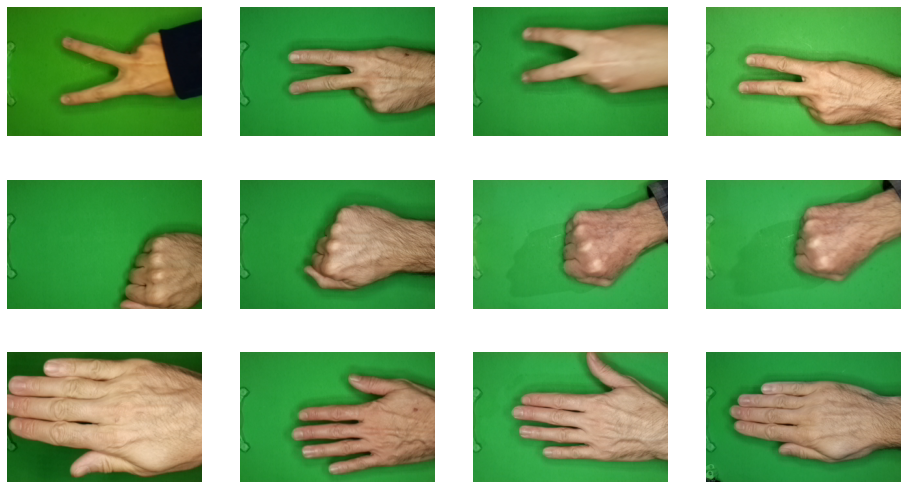

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                         #Jumlah baris tampilan gambar
ncols = 4                                                                         #Jumlah baris tampilan gambar

pic_index = 0                                                                     #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                    #Index tambah bertambah 4 setiap baris
gbr_tampil_gunting  = [os.path.join(fold_gunting, fname)                          #Menampilkan gambar gunting
                      for fname in file_gunting[pic_index-4:pic_index]]
gbr_tampil_batu     = [os.path.join(fold_batu, fname)                             #Menampilkan gambar batu
                      for fname in file_batu[pic_index-4:pic_index]]
gbr_tampil_kertas   = [os.path.join(fold_kertas, fname)                           #Menampilkan gambar kertas
                      for fname in file_kertas[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_batu+gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Image Generator

In [6]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

# Augmentasi dan Pemisahan Data menjadi Training dan Validation

In [23]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"                           #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>AUGMENTASI<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
	    rotation_range=40,                                                          #Menerapkan skenario rotasi gambar hingga 40 derajat          
      width_shift_range=0.4,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.4,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.4,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.4,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat 
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI<<<<<<<<<<<<<<<<      
      validation_split=0.4                                                        #80% Data Training, 20% Data Validasi
      )

Pelabelan Data menggunakan Image Data Generator 

In [24]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Model Jaringan saraf Tiruan (Model Sequential)

In [9]:
model = tf.keras.models.Sequential([                                              #Membentuk model sequential
                                                                                  #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                #Layer output
])

model.summary()                                                                   #Menampilkan summary model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

Kompilasi Model

In [26]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='rmsprop',                                                #Fungsi optimizer(Yang Pernah diajarkan adalah 'adam')
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

# Melatih Model Jaringan Saraf Tiruan

In [41]:
history=model.fit(
    train_generator,                                                              #Data training hasil generasi
    steps_per_epoch=4,                                                            #Jumlah batch yang akan dieksekusi pada setiap epoch
    epochs=2,                                                                    #Jumlah perulangan komputasi(epoch)
    validation_data=validation_generator,                                         #Menampilkan akurasi pengujian data validasi
    validation_steps=4,                                                           #Jumlah batch yang akan dieksekusi pada setiap epoch
    verbose=2, 
    )

Epoch 1/2
4/4 - 6s - loss: 0.4257 - accuracy: 0.8203 - val_loss: 0.2750 - val_accuracy: 0.9219 - 6s/epoch - 1s/step
Epoch 2/2
4/4 - 5s - loss: 0.2855 - accuracy: 0.9219 - val_loss: 0.4188 - val_accuracy: 0.9141 - 5s/epoch - 1s/step


# Akurasi Training dan Validasi

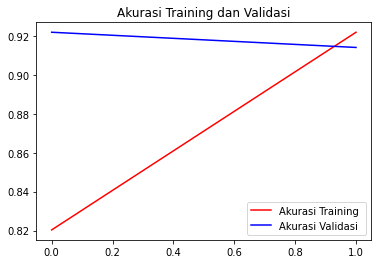

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

# Uji Coba

Saving 1_EmLMunFFKsT-rYMgWISKlw.png to 1_EmLMunFFKsT-rYMgWISKlw (1).png
1_EmLMunFFKsT-rYMgWISKlw.png
Tangan Ini Menunjukkan bentuk KERTAS


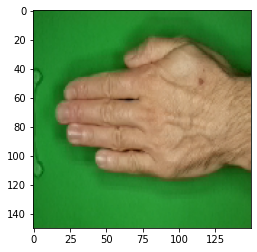

In [43]:
import numpy as np                                                                #Mengimpor modul numpy
from google.colab import files                                                    #Mengimpor modul import file
from keras.preprocessing import image                                             #Mengimpor modul keras_preprocessing untuk gambar

uploaded = files.upload()                                                         #Mengunggah gambar yang akan dikenali model

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                              #Mengubah ukuran gambar menjadi 150x150 piksel
  imgplot = plt.imshow(img)                                                       #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                 #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')                                   #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0][2]==1:
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')                                                      #Jika gambar yang diunggah selain gambar tangan yang diinginkan, tampilkan "Tidak Diketahui"
